In [134]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
with open('boundaries.pkl','rb') as f:
    boundaries = pickle.load(f, encoding='latin1')

In [6]:
type(boundaries)

dict

In [9]:
boundaries.keys()

dict_keys(['communes', 'lakes', 'corner'])

In [54]:
boundaries['communes'][1]['points']

[array([[192795, 159950],
        [193136, 160587],
        [192782, 161150],
        [192835, 162037],
        [193096, 162003],
        [192699, 162294],
        [192830, 162621],
        [193645, 162847],
        [193778, 163264],
        [194311, 163056],
        [194334, 163216],
        [195731, 162178],
        [195521, 161228],
        [194978, 161026],
        [195065, 159761],
        [193937, 159691],
        [193699, 159338],
        [192795, 159950]])]

In [64]:
import folium
import json
commune_geo_path = r'ch_municipalities.geojson'
geo_json_data = json.load(open(commune_geo_path))
m_ch = folium.Map([46.8,8], zoom_start=8)
folium.GeoJson(geo_json_data).add_to(m_ch)
m_ch

In [89]:
import sqlite3
from sqlite3 import Error
 
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

def show_all_tables(conn):
    cursor = conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';") 
    print(cursor.fetchall())    
    
    
def select_all_tasks(conn):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT name_en,postal_code,population FROM municipalities")
    names = list(map(lambda x: x[0], cur.description))
    print(names)
    df = pd.read_sql_query("SELECT name_en,postal_code,population FROM municipalities",conn)
    return df
 
    #rows = cur.fetchall()
    #for row in rows:
        #print(row)
#     df = pd.read_sql_table(rows, conn)
#     return df


[('votes',), ('cantons',), ('municipalities',), ('canton_vote',), ('municipality_vote',)]
['name_en', 'postal_code', 'population']


In [91]:
database = "tempolitics.sqlite"

# create a database connection
conn = create_connection(database)
with conn:
    show_all_tables(conn)
    #print("2. Query all tasks")
    df = select_all_tasks(conn)

[('votes',), ('cantons',), ('municipalities',), ('canton_vote',), ('municipality_vote',)]
['name_en', 'postal_code', 'population']


In [93]:
df.head(10)

,name_en,postal_code,population
0,Aeugst am Albis,8914,1822
1,Affoltern am Albis,8910,11063
2,Bonstetten,8906,5164
3,Hausen am Albis,8915,3362
4,Hedingen,8908,3408
5,Kappel am Albis,8926,918
6,Knonau,8934,1802
7,Maschwanden,8933,612
8,Mettmenstetten,8932,4245
9,Obfelden,8912,4682


In [94]:
with open('dataset.pkl','rb') as f:
    dataset = pickle.load(f)

In [106]:
data = pd.DataFrame(dataset)

In [110]:
data.columns = ['date','latitude', 'longitude', 'language']

In [115]:
data.dtypes

date         object
latitude     object
longitude    object
language     object
dtype: object

In [117]:
data.head()

,date,latitude,longitude,language
0,2010-02-23 05:55:51,\N,\N,nl
1,2010-02-23 06:22:40,\N,\N,en
2,2010-02-23 07:34:25,\N,\N,en
3,2010-02-23 07:51:47,\N,\N,en
4,2010-02-23 08:02:57,\N,\N,fr


In [131]:
data['year'] = data['date'].map(lambda x: x.split(' ')[0].split('-')[0])
data['month'] = data['date'].map(lambda x: x.split(' ')[0].split('-')[1])
data.head()

,date,latitude,longitude,language,year,month
0,2010-02-23 05:55:51,\N,\N,nl,2010,02
1,2010-02-23 06:22:40,\N,\N,en,2010,02
2,2010-02-23 07:34:25,\N,\N,en,2010,02
3,2010-02-23 07:51:47,\N,\N,en,2010,02
4,2010-02-23 08:02:57,\N,\N,fr,2010,02


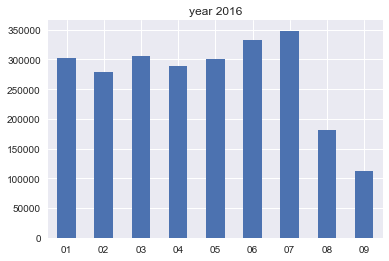

In [161]:
data[data['year']=='2016']['month'].value_counts().sort_index().plot(kind='bar', rot=0, title = 'year 2016')

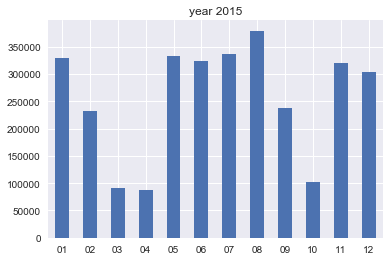

In [162]:
data[data['year']=='2015']['month'].value_counts().sort_index().plot(kind='bar', rot=0, title = 'year 2015')

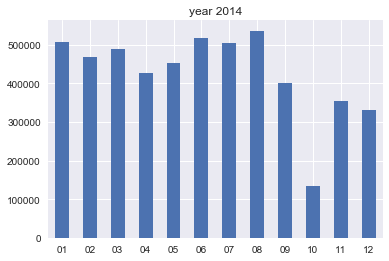

In [163]:
data[data['year']=='2014']['month'].value_counts().sort_index().plot(kind='bar', rot=0, title = 'year 2014');

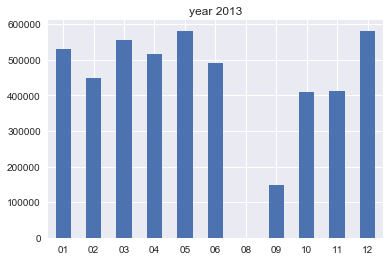

In [164]:
data[data['year']=='2013']['month'].value_counts().sort_index().plot(kind='bar', rot=0, title = 'year 2013');

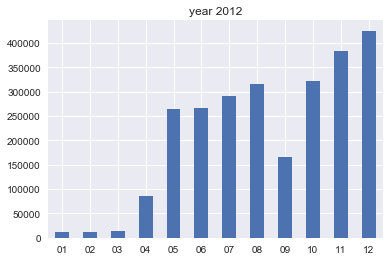

In [165]:
data[data['year']=='2012']['month'].value_counts().sort_index().plot(kind='bar', rot=0, title = 'year 2012');

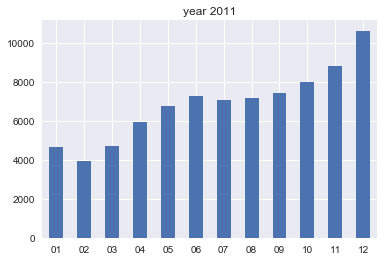

In [166]:
data[data['year']=='2011']['month'].value_counts().sort_index().plot(kind='bar', rot=0, title = 'year 2011');